# Advanced Derivatives Pricings Project

In [16]:
##common variable we assume
r = 0.05
T = 1
Runtimes = [10,100,500,1000,2000,5000,10000,20000]
stock_price_list = [30,50,70,90,100,110,130,150,200,230]
Volatility = [0.1,0.2,0.5,0.7,0.9]
Correlation = [-0.9,-0.5,-0.2,0,0.2,0.5,0.9,0.95,0.98,0.99,0.999]
Strike_ratio = [0.1,0.3,0.5,0.7,0.9,1.1]

In [2]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [3]:
def Monte_Carlo_and_Kirk_Approximation(Runtime,S0_1,S0_2,sigma_1,sigma_2,corr,K):
    np.random.seed(1)
    V1 = np.zeros(Runtime)
    V2 = np.zeros(Runtime)
    ## Monte_carlo simulation
    for i in range(Runtime):
        dw1 = np.sqrt(T)*np.random.randn()
        dw2 = corr*dw1+np.sqrt(1-corr*corr)*np.random.randn()*np.sqrt(T)
        ST1 = S0_1*np.exp((r-0.5*sigma_1**2)*T+sigma_1*dw1)
        ST2 = S0_2*np.exp((r-0.5*sigma_2**2)*T+sigma_2*dw2)
        V1[i] = np.exp(-r*T)*max(ST1 - ST2 - K, 0)  ## the payoff under Monte_carlo_estimation

        ##Kirk approximation
        sigma_Kirk = np.sqrt(sigma_1**2+sigma_2**2*(S0_2/(S0_2+K*np.exp(-r*T)))**2
                             -2*corr*sigma_1*sigma_2*(S0_2/(S0_2+K*np.exp(-r*T))))
        d1 = (np.log(S0_1/(S0_2+K*np.exp(-r*T)))+0.5*sigma_Kirk**2*T)/(sigma_Kirk*np.sqrt(T))
        d2 = (np.log(S0_1/(S0_2+K*np.exp(-r*T)))-0.5*sigma_Kirk**2*T)/(sigma_Kirk*np.sqrt(T))
        V2[i] = S0_1*norm.cdf(d1)-(S0_2+K*np.exp(-r*T))*norm.cdf(d2)  ## the payoff under Kirk Approximation

    return np.mean(V1), np.mean(V2)

In [4]:
def Runtimes_Effect():
    runtimes_res_V1 = [] #Monte_Carlo
    runtimes_res_V2 = [] #Kirk_Approximation
    for simulation_times in Runtimes:  ## we want to look the effect of simulation times,so we need make other parameters constant
        S0_1 = 110
        S0_2 = 80
        K = 30
        sigma_1 = 0.2
        sigma_2 = 0.2
        corr = 0.5
        temp1,temp2 = Monte_Carlo_and_Kirk_Approximation(simulation_times,S0_1,S0_2,sigma_1,sigma_2,corr,K)
        runtimes_res_V1.append(temp1)
        runtimes_res_V2.append(temp2)
    plt.plot(np.log(Runtimes),runtimes_res_V1,color='r',label='Monte_Carlo',linestyle='-')
    plt.plot(np.log(Runtimes),runtimes_res_V2,color='b',label='Kirk_Approximation',linestyle='-')
    for a, b in zip(np.log(Runtimes), runtimes_res_V1): plt.text(a, b, str(b)[0:5])
    plt.text(np.log(Runtimes[0]),runtimes_res_V2[0],str(runtimes_res_V2[0])[0:5])
    plt.xlabel('log(Simulation_Times)')
    plt.ylabel('value of spread option')
    plt.legend()
    plt.savefig('Simulation_Times')
    plt.show()
    plt.close()

    plt.plot(np.log(Runtimes), abs(np.array(runtimes_res_V1) - np.array(runtimes_res_V2)), color='r',label='abs(MC - Kirk)',linestyle='-')
    for a, b in zip(np.log(Runtimes), abs(np.array(runtimes_res_V1) - np.array(runtimes_res_V2))): plt.text(a, b, str(b)[0:5])
    plt.xlabel('log(Simulation_Times)')
    plt.ylabel('abs(MC - Kirk)')
    plt.legend()
    plt.savefig('Simulation_Times_abs')
    plt.show()

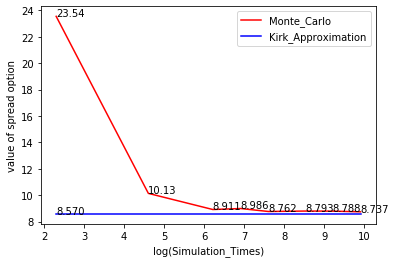

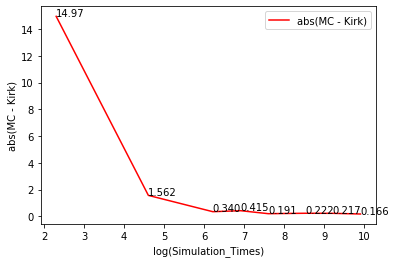

In [5]:
Runtimes_Effect()

In [6]:
def S_distance_Effect():
    res_V1 = []  #Monte_Carlo
    res_V2 = []  #Kirk_Approximation
    distance = []
    S0_1 = 100
    for S0_2 in stock_price_list:
        distance.append(S0_1-S0_2)
        simulation_times = 10000
        K = 30
        sigma_1 = 0.2
        sigma_2 = 0.2
        corr = 0.5
        temp1,temp2 = Monte_Carlo_and_Kirk_Approximation(simulation_times,S0_1,S0_2,sigma_1,sigma_2,corr,K)
        res_V1.append(temp1)
        res_V2.append(temp2)

    plt.plot(distance,res_V1,color='r',label='Monte_Carlo',marker='*',linestyle='--')
    plt.plot(distance,res_V2,color='b',label='Kirk_Approximation',marker='x',linestyle='--')
    for a, b in zip(distance, res_V1): plt.text(a, b+3, str(b)[0:5])
    #for a, b in zip(distance, res_V2):  plt.text(a,b,str(b)[0:5])
    plt.xlabel('S1(0) - S2(0)')
    plt.ylabel('value of spread option')
    plt.legend()
    plt.savefig('Stock_price_difference')
    plt.show()
    
    plt.close()

    plt.plot(distance, abs(np.array(res_V1) - np.array(res_V2)), color='r',label='abs(MC - Kirk)',linestyle='-')
    for a, b in zip(distance, abs(np.array(res_V1) - np.array(res_V2))): plt.text(a, b, str(b)[0:5])
    plt.xlabel('S1(0) - S2(0)')
    plt.ylabel('abs(MC - Kirk)')
    plt.legend()
    plt.savefig('Stock_price_difference_2')
    plt.show()
    
    
    plt.close()
    res_V1 = np.array(res_V1)
    res_V2 = np.array(res_V2)

    plt.plot(distance, abs(res_V2 - res_V1) / res_V1, color='r',label='pricing error %',linestyle='-')
    for a, b in zip(distance, abs(res_V2 - res_V1) / res_V1): plt.text(a, b, str(b)[0:5])
    plt.xlabel('S1(0) - S2(0)')
    plt.ylabel('pricing error %')
    plt.legend()
    plt.savefig('Stock_price_difference_3')
    plt.show()
    
    

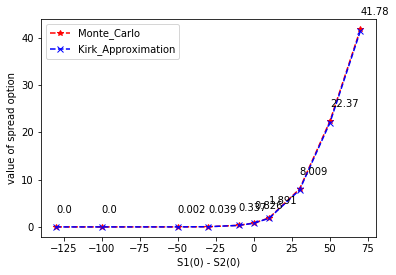

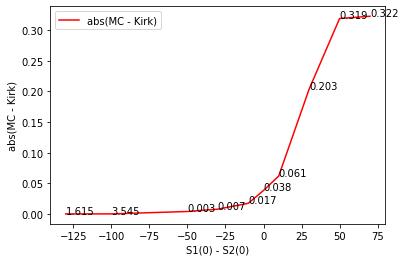

/Users/jj/miniconda3/envs/hejj3/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in true_divide
/Users/jj/miniconda3/envs/hejj3/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


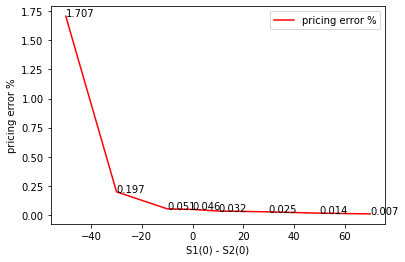

In [7]:
S_distance_Effect()

In [8]:
def Vol_Effect():
    res_V1 = []  #Monte_Carlo
    res_V2 = []  #Kirk_Approximation
    for vol in Volatility:
        S0_1 = 110
        S0_2 = 80
        simulation_times = 10000
        K = 30
        sigma_1 = vol
        sigma_2 = vol
        corr = 0.5
        temp1,temp2 = Monte_Carlo_and_Kirk_Approximation(simulation_times,S0_1,S0_2,sigma_1,sigma_2,corr,K)
        res_V1.append(temp1)
        res_V2.append(temp2)
    plt.plot(Volatility,res_V1,color='r',label='Monte_Carlo',marker='*',linestyle='--')
    plt.plot(Volatility,res_V2,color='b',label='Kirk_Approximation',marker='x',linestyle='--')
    for a, b in zip(Volatility, res_V1): plt.text(a, b+2, str(b)[0:5])
    for a, b in zip(Volatility, res_V2):  plt.text(a,b-2,str(b)[0:5])
    plt.xlabel('volatility')
    plt.ylabel('value of spread option')
    plt.legend()
    plt.savefig('Same_sigma')
    plt.show()
    
    
    plt.close()

    plt.plot(Volatility, abs(np.array(res_V1) - np.array(res_V2)), color='r',label='abs(MC - Kirk)',linestyle='-')
    for a, b in zip(Volatility, abs(np.array(res_V1) - np.array(res_V2))): plt.text(a, b, str(b)[0:5])
    plt.xlabel('volatility')
    plt.ylabel('abs(MC - Kirk)')
    plt.legend()
    plt.savefig('Same_sigma_abs')
    plt.show()

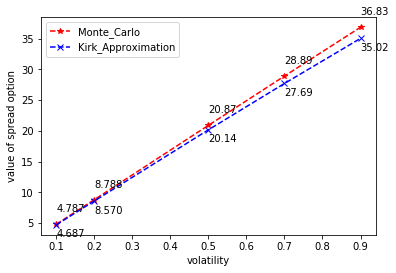

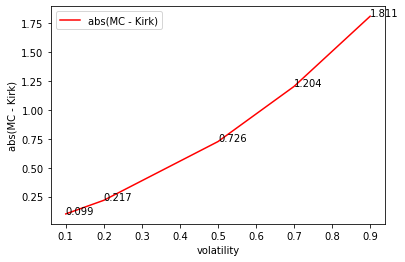

In [9]:
Vol_Effect()

In [19]:
def Vol_Distance_Effect():
    res_V1 = []  #Monte_Carlo
    res_V2 = []  #Kirk_Approximation
    sigma_1 = 0.5
    vol_distance = []
    for vol in Volatility:
        vol_distance.append(sigma_1-vol)
        S0_1 = 110
        S0_2 = 80
        simulation_times = 50000
        K = 30
        sigma_2 = vol
        corr = 0.5
        temp1,temp2 = Monte_Carlo_and_Kirk_Approximation(simulation_times,S0_1,S0_2,sigma_1,sigma_2,corr,K)
        res_V1.append(temp1)
        res_V2.append(temp2)
    plt.plot(vol_distance,res_V1,color='r',label='Monte_Carlo',marker='*',linestyle='--')
    plt.plot(vol_distance,res_V2,color='b',label='Kirk_Approximation',marker='x',linestyle='--')
    for a, b in zip(vol_distance, res_V1): plt.text(a, b+0.5, str(b)[0:5])
    for a, b in zip(vol_distance, res_V2):  plt.text(a,b-0.5,str(b)[0:5])
    plt.xlabel('vol1 - vol2')
    plt.ylabel('value of spread option')
    plt.legend()
    plt.savefig('Vol_Difference')
    plt.show()

    plt.close()

    plt.plot(Volatility, abs(np.array(res_V1) - np.array(res_V2)), color='r',label='abs(MC - Kirk)',linestyle='-')
    for a, b in zip(Volatility, abs(np.array(res_V1) - np.array(res_V2))): plt.text(a, b, str(b)[0:5])
    plt.xlabel('vol2')
    plt.ylabel('abs(MC - Kirk)')
    plt.legend()
    plt.savefig('Vol_Difference_2')
    plt.show()
    
    plt.close()

    plt.plot(vol_distance, abs(np.array(res_V1) - np.array(res_V2)), color='r',label='abs(MC - Kirk)',linestyle='-')
    for a, b in zip(vol_distance, abs(np.array(res_V1) - np.array(res_V2))): plt.text(a, b, str(b)[0:5])
    plt.xlabel('vol1 - vol2')
    plt.ylabel('abs(MC - Kirk)')
    plt.legend()
    plt.savefig('Vol_Difference_3')
    plt.show()
    
    plt.close()
    res_V1 = np.array(res_V1)
    res_V2 = np.array(res_V2)

    plt.plot(vol_distance, abs(res_V2 - res_V1) / res_V1, color='r',label='pricing error %',linestyle='-')
    for a, b in zip(vol_distance, abs(res_V2 - res_V1) / res_V1): plt.text(a, b, str(b)[0:5])
    plt.xlabel('vol1 - vol2')
    plt.ylabel('pricing error %')
    plt.legend()
    plt.savefig('Vol_Difference_4')
    plt.show()

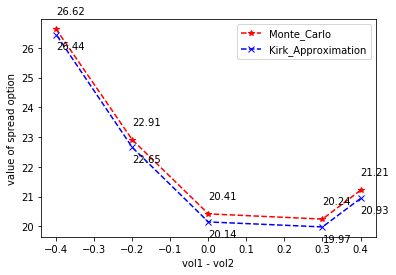

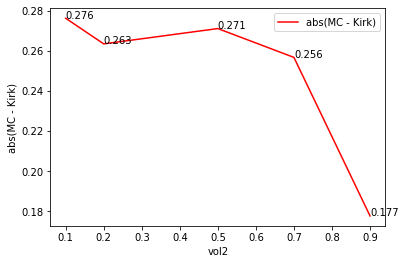

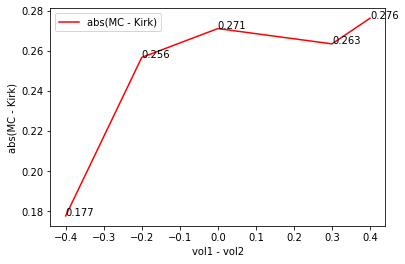

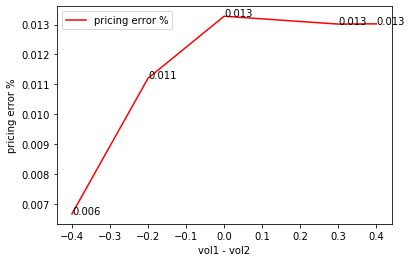

In [20]:
Vol_Distance_Effect()

In [29]:
def Corr_Effect():
    res_V1 = []  #Monte_Carlo
    res_V2 = []  #Kirk_Approximation
    for corr in Correlation:
        S0_1 = 110
        S0_2 = 80
        simulation_times = 10000
        K = 30
        sigma_1 = 0.2
        sigma_2 = 0.2
#         corr = 0.5
        temp1,temp2 = Monte_Carlo_and_Kirk_Approximation(simulation_times,S0_1,S0_2,sigma_1,sigma_2,corr,K)
        res_V1.append(temp1)
        res_V2.append(temp2)
    plt.plot(Correlation,res_V1,color='r',label='Monte_Carlo',marker='*',linestyle='--')
    plt.plot(Correlation,res_V2,color='b',label='Kirk_Approximation',marker='x',linestyle='--')
    for a, b in zip(Correlation[:8], res_V1[:8]): plt.text(a, b, str(b)[0:5])
    a, b=(Correlation[10], res_V1[10])
    plt.text(a, b, str(b)[0:5])
    for a, b in zip(Correlation[:6], res_V2[:6]): plt.text(a,b-1,str(b)[0:5])
    plt.xlabel('correlation')
    plt.ylabel('value of spread option') 
    plt.legend()
    
    plt.savefig('Correlation')
    plt.show()
    
    plt.close()

    # abs error
    plt.plot(Correlation, abs(np.array(res_V1) - np.array(res_V2)), color='r',label='abs(MC - Kirk)',linestyle='-')
    for a, b in zip(Correlation, abs(np.array(res_V1) - np.array(res_V2))): plt.text(a, b, str(b)[0:5])
    plt.xlabel('correlation')
    plt.ylabel('abs(MC - Kirk)')
    plt.legend()
    plt.savefig('Correlation_2')
    plt.show()
    
    plt.close()
    
    # percentage error
    res_V1 = np.array(res_V1)
    res_V2 = np.array(res_V2)

    plt.plot(Correlation, abs(res_V2 - res_V1) / res_V1, color='r',label='pricing error %',linestyle='-')
    for a, b in zip(Correlation, abs(res_V2 - res_V1) / res_V1): plt.text(a, b, str(b)[0:5])
    plt.xlabel('correlation')
    plt.ylabel('pricing error %')
    plt.legend()
    plt.savefig('Correlation_3')
    plt.show()
    
    
    

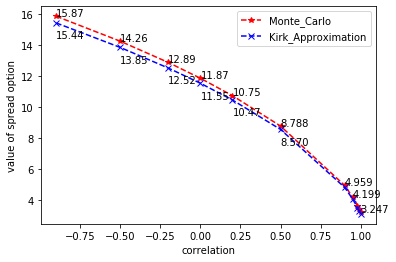

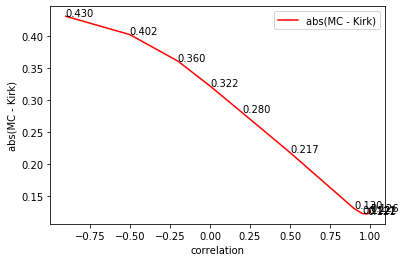

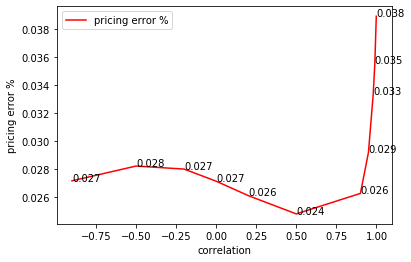

In [30]:
Corr_Effect()

In [14]:
def Strike_Effect():
    res_V1 = []  #Monte_Carlo
    res_V2 = []  #Kirk_Approximation
    for strike_r in Strike_ratio:
        S0_1 = 110
        S0_2 = 80
        simulation_times = 10000
        K = S0_2*strike_r
        sigma_1 = 0.2
        sigma_2 = 0.2
        corr = 0.5
        temp1,temp2 = Monte_Carlo_and_Kirk_Approximation(simulation_times,S0_1,S0_2,sigma_1,sigma_2,corr,K)
        res_V1.append(temp1)
        res_V2.append(temp2)
    plt.plot(Strike_ratio,res_V1,color='r',label='Monte_Carlo',marker='*',linestyle='--')
    plt.plot(Strike_ratio,res_V2,color='b',label='Kirk_Approximation',marker='x',linestyle='--')
    for a, b in zip(Strike_ratio, res_V1): plt.text(a, b, str(b)[0:5])
    #for a, b in zip(Strike_ratio, res_V2):  plt.text(a,b,str(b)[0:5])
    plt.xlabel('Strike / S2(0)')
    plt.ylabel('value of spread option')
    plt.legend()
    
    plt.savefig('Strike')
    plt.show()
    
    plt.close()
    res_V1 = np.array(res_V1)
    res_V2 = np.array(res_V2)

    plt.plot(Strike_ratio, abs(res_V2 - res_V1) / res_V1, color='r',label='pricing error %',linestyle='-')
    for a, b in zip(Strike_ratio, abs(res_V2 - res_V1) / res_V1): plt.text(a, b, str(b)[0:5])
    plt.xlabel('Strike / S2(0)')
    plt.ylabel('pricing error %')
    plt.legend()
    plt.savefig('Strike_error')
    plt.show()

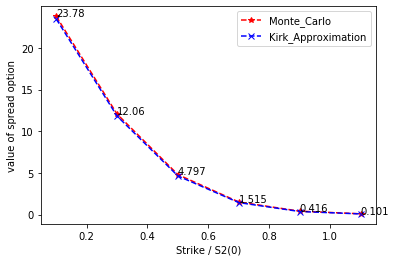

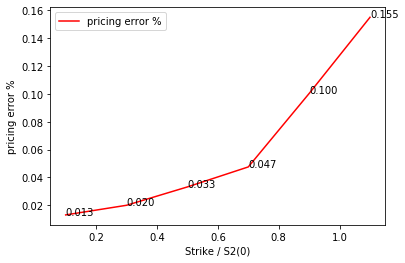

In [15]:
Strike_Effect()